In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random
from pprint import pprint

In [3]:
file_path = os.path.join("..", "Resources", "housingCensus.csv")
housingCensusDF = pd.read_csv(file_path)
print(f"Data Shape: {housingCensusDF.shape}")
housingCensusDF.head()

Data Shape: (427, 34)


,Geo_ID,Geographic Area Name,Year,Estimate HOUSING OCCUPANCY Total housing units,Estimate HOUSING OCCUPANCY Occupied housing units,Estimate HOUSING OCCUPANCY Vacant housing units,Estimate YEAR STRUCTURE BUILT Total housing units,Estimate YEAR STRUCTURE BUILT Built 2005 or later,Estimate YEAR STRUCTURE BUILT Built 2000 to 2004,Estimate YEAR STRUCTURE BUILT Built 1990 to 1999,...,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),State
0,1,United States,2012,132452249.0,115969540.0,16482709.0,132452249.0,1199560.0,19799406.0,18348209.0,...,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,Texas
1,1000,"Abilene city, Texas",2012,48583.0,42756.0,5827.0,48583.0,669.0,4371.0,3133.0,...,4654,7085,4910,3475,1338,645,71,0,95300.0,Texas
2,1924,"Allen city, Texas",2012,28802.0,28574.0,228.0,28802.0,1026.0,12728.0,7679.0,...,80,425,3321,6738,5524,3323,1345,286,199600.0,Texas
3,3000,"Amarillo city, Texas",2012,80816.0,74018.0,6798.0,80816.0,669.0,9818.0,6229.0,...,5144,13317,13526,6681,4093,1670,571,102,115000.0,Texas
4,4000,"Arlington city, Texas",2012,147340.0,132941.0,14399.0,147340.0,755.0,19901.0,28780.0,...,3302,16210,26830,13884,9746,2086,860,79,129100.0,Texas


In [3]:
file_path = os.path.join("..", "Resources", "analysis_crime.csv")
crimeDF = pd.read_csv(file_path)
print(f"Data Shape: {crimeDF.shape}")
crimeDF.head()

Data Shape: (70, 9)


,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586


In [4]:
housingPriceRangeDF= pd.DataFrame(housingCensusDF[['Geo_ID', 'Year', 'Geographic Area Name','Estimate VALUE Owner-occupied units', 'Estimate VALUE Median (dollars)']])

housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,Estimate VALUE Owner-occupied units,Estimate VALUE Median (dollars)
0,1,2012,United States,74119256,171900.0
1,1000,2012,"Abilene city, Texas",22178,95300.0
2,1924,2012,"Allen city, Texas",21042,199600.0
3,3000,2012,"Amarillo city, Texas",45104,115000.0
4,4000,2012,"Arlington city, Texas",72997,129100.0


In [5]:
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace("city, Texas","", regex=True)

housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace(", Texas","", regex=True)
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].str.strip()

# housingPriceRangeDF['Estimate VALUE Less than $150,000'] = housingPriceRangeDF['Estimate VALUE Less than $50,000'] + housingPriceRangeDF['Estimate VALUE $50,000 to $99,999'] + housingPriceRangeDF['Estimate VALUE $100,000 to $149,999']
# housingPriceRangeDF['Estimate VALUE $150,000 to $299,999'] =  housingPriceRangeDF['Estimate VALUE $150,000 to $199,999'] + housingPriceRangeDF['Estimate VALUE $200,000 to $299,999']
# housingPriceRangeDF['Estimate VALUE Between 0 and $300,000'] = housingPriceRangeDF['Estimate VALUE Less than $150,000'] + housingPriceRangeDF['Estimate VALUE $150,000 to $299,999']
 
housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,Estimate VALUE Owner-occupied units,Estimate VALUE Median (dollars)
0,1,2012,United States,74119256,171900.0
1,1000,2012,Abilene,22178,95300.0
2,1924,2012,Allen,21042,199600.0
3,3000,2012,Amarillo,45104,115000.0
4,4000,2012,Arlington,72997,129100.0


In [6]:
cityNames = [35000, 70808, 77546 ]

housingPriceHoustonDF = housingPriceRangeDF[housingPriceRangeDF['Geo_ID'].isin(cityNames)]


housingPriceHoustonDF = housingPriceHoustonDF.rename(columns={'Geographic Area Name': 'City'})

#housingPriceHoustonDF.to_csv('houstonHousing.csv', index = False)

housingPriceHoustonDF = housingPriceHoustonDF.reset_index(drop = True)

print(housingPriceHoustonDF)
#

    Geo_ID  Year         City  Estimate VALUE Owner-occupied units  \
0    35000  2012      Houston                               343902   
1    70808  2012   Sugar Land                                21478   
2    35000  2013      Houston                               350611   
3    70808  2013   Sugar Land                                22349   
4    35000  2014      Houston                               347479   
5    70808  2014   Sugar Land                                24482   
6    35000  2015      Houston                               351584   
7    70808  2015   Sugar Land                                23668   
8    35000  2016      Houston                               374439   
9    70808  2016   Sugar Land                                23207   
10   35000  2017      Houston                               358277   
11   70808  2017   Sugar Land                                22363   
12   70808  2018   Sugar Land                                32629   
13   35000  2018    

In [7]:
# crime data filtered
 
mergedDF = pd.merge(crimeDF, housingPriceHoustonDF, on = ['City', 'Year'], how='inner' )

print (mergedDF)

           City  Year  Population  Violent Crime  Property Crime  Total Crime  \
0   Friendswood  2012     36965.0           15.0           353.0        368.0   
1       Houston  2012   2177273.0        21610.0        107678.0     129288.0   
2    Sugar Land  2012     82924.0          109.0          1541.0       1650.0   
3   Friendswood  2013     37226.0           11.0           418.0        429.0   
4       Houston  2013   2180606.0        20993.0        110919.0     131912.0   
5    Sugar Land  2013     83460.0          108.0          1613.0       1721.0   
6   Friendswood  2014     38012.0           21.0           329.0        350.0   
7       Houston  2014   2219933.0        22008.0        104197.0     126205.0   
8    Sugar Land  2014     85055.0           99.0          1400.0       1499.0   
9   Friendswood  2015     38851.0           28.0           355.0        383.0   
10      Houston  2015   2275221.0        21994.0        100053.0     122047.0   
11   Sugar Land  2015     88

In [56]:
#build crime random sample for Houston

x_listHouston = mergedDF.loc[(mergedDF["City"] == 'Houston'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleHouston = []

previousItem = 0.0 
for index, item in x_listHouston.iterrows() :
    for i in range (1,100) :
        if (item['Total Crime Per Capita [10,000]'] < (previousItem)) :
            x = round(random.uniform(item, previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item ),2)
        crimeRandomSampleHouston.append(x * 1.0)
        previousitem = x


        crimeRandomSampleHoustondf = pd.DataFrame(crimeRandomSampleHouston)

crimeRandomSampleHoustondf
        

,"Total Crime Per Capita [10,000]"
1,547.59
1,535.58
1,57.63
1,548.25
1,400.62
...,...
19,487.22
19,384.51
19,319.06
19,81.38


In [62]:
#build price bin samples for values friendswood 

y_listHouston = mergedDF.loc[(mergedDF["City"] == 'Houston'), ['Estimate VALUE Owner-occupied units', 'Population']]
y_listHouston['Estimate VALUE Owner-occupied units'] = (y_listHouston['Estimate VALUE Owner-occupied units'] / y_listHouston['Population']) * 10000

houstonRandomSample = []

previousItem = 0 
for index, item in y_listHouston.iterrows() :
    for i in range (1,100) :
        if (item['Estimate VALUE Owner-occupied units'] < (previousItem)) :
            x = round(random.uniform(item['Estimate VALUE Owner-occupied units'], previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item['Estimate VALUE Owner-occupied units'] ),2)
        houstonRandomSample.append(x * 1.0)
        previousitem = x

crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units']  = houstonRandomSample

crimeRandomSampleHoustondf.head()

,"Total Crime Per Capita [10,000]",Estimate VALUE Owner-occupied units
1,547.59,937.02
1,535.58,205.55
1,57.63,910.98
1,548.25,107.52
1,400.62,705.11


In [79]:
#build crime random sample for Friendswood

x_listFriendswood = mergedDF.loc[(mergedDF["City"] == 'Sugar Land'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleFriendswood = []

previousItem = 0.0 
for index, item in x_listFriendswood.iterrows() :
    for i in range (1,100) :
        if (item['Total Crime Per Capita [10,000]'] < (previousItem)) :
            x = round(random.uniform(item, previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item ),2)
        crimeRandomSampleFriendswood.append(x * 1.0)
        previousitem = x

crimeRandomSampleFriendswooddf = pd.DataFrame(crimeRandomSampleFriendswood)

crimeRandomSampleFriendswooddf
           
        

,"Total Crime Per Capita [10,000]"
2,106.71
2,112.99
2,17.35
2,69.64
2,180.76
...,...
20,120.23
20,124.92
20,39.66
20,36.36


In [80]:
#build price bin samples for values houston 

y_listFriendswood = mergedDF.loc[(mergedDF["City"] == 'Sugar Land'), ['Estimate VALUE Owner-occupied units', 'Population']]
y_listFriendswood['Estimate VALUE Owner-occupied units'] = (y_listFriendswood['Estimate VALUE Owner-occupied units'] / y_listFriendswood['Population']) * 10000

friendswoodRandomSample = []

previousItem = 0 
for index, item in y_listFriendswood.iterrows() :
    for i in range (1,100) :
        if (item['Estimate VALUE Owner-occupied units'] < (previousItem)) :
            x = round(random.uniform(item['Estimate VALUE Owner-occupied units'], previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item['Estimate VALUE Owner-occupied units'] ),2)
        friendswoodRandomSample.append(x* 1.0)
        previousitem = x

len (friendswoodRandomSample)    


crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units']  = friendswoodRandomSample

crimeRandomSampleFriendswooddf.head()

,"Total Crime Per Capita [10,000]",Estimate VALUE Owner-occupied units
2,106.71,1908.43
2,112.99,2305.40
2,17.35,503.63
2,69.64,1957.87
2,180.76,525.94


In [1]:


# Perform a linear regression on crime vs price
(slopeH, interceptH, rvalueH, pvalueH, stderrH) = stats.linregress(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'] )
# Get regression values
regress_valuesHouston = crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'] * slopeH + interceptH

 # Create line equation string
line_eqH = "Houston : y = " + str(round(slopeH,2)) + "x +" + str(round(interceptH,2))


# Perform a linear regression on temperature vs. latitude
(slopeF, interceptF, rvalueF, pvalueF, stderrF) = stats.linregress(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'] )
# Get regression values
regress_valuesFriendswood = crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'] * slopeF + interceptF
 # Create line equation string
line_eqF = "Sugarland : y = " + str(round(slopeF,2)) + "x +" + str(round(interceptF,2))


# Create Plot
ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color ='skyblue',  alpha=0.5, figsize=(10, 7))

crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color ='brown', alpha=0.5, figsize=(10, 7),  ax=ax1)

plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'],regress_valuesHouston,"b-")
plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'],regress_valuesFriendswood,"r-")

plt.text(300,2000,line_eqH, fontsize=10,color="green")
plt.text(300,2200,line_eqF, fontsize=10,color="green")

# plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
# plt.plot(x_values,regress_values,"r-")


# Scatter plots.
# ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color='blue', alpha=0.5, figsize=(10, 7))
# crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color='brown', alpha=0.5, figsize=(10, 7), ax=ax1)

# # polynomial - males
# male_fit = np.polyfit(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'], 1)
# female_fit = np.polyfit(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'], 1)

# # # regression lines
# plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], male_fit[0] * crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'] + male_fit[1], color='darkblue', linewidth=1)
# plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], female_fit[0] * crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'] + female_fit[1], color='brown', linewidth=1)
# # # regression equations
# plt.text(100, 200, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
# plt.text(120, 300, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)



print(f"The r for Houston is: {rvalueH}")
print(f"The r for Sugrland  is: {rvalueF}")

# legend, title and labels.
plt.legend(labels=['Houston Regresion Line', 'Sugar Land Regresion Line', 'Houston', 'Sugar Land'])
plt.title('Relationship between Crime and Units Sold for Houston and Sugarland', size=15)
plt.xlabel('Total Crime Per Capita [10,000]', size=18)
plt.ylabel('Units Sold Per Capita', size=18);


# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Crime and Units Sold for Houston and Sugarland.png")
plt.savefig(output_path)

#show the graph
plt.show()

NameError: name 'stats' is not defined

In [103]:
#build crime random sample for Friendswood

x_listFriendswood = mergedDF.loc[(mergedDF["City"] == 'Friendswood'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleFriendswood = []

previousItem = 0.0 
for index, item in x_listFriendswood.iterrows() :
    for i in range (1,100) :
        if (item['Total Crime Per Capita [10,000]'] < (previousItem)) :
            x = round(random.uniform(item, previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item ),2)
        crimeRandomSampleFriendswood.append(x * 1.0)
        previousitem = x

crimeRandomSampleFriendswooddf = pd.DataFrame(crimeRandomSampleFriendswood)

crimeRandomSampleFriendswooddf
           
        

,"Total Crime Per Capita [10,000]"
0,98.77
0,13.99
0,85.02
0,11.36
0,96.33
...,...
18,78.11
18,53.67
18,12.69
18,45.40


In [104]:
#build price bin samples for values houston 

y_listFriendswood = mergedDF.loc[(mergedDF["City"] == 'Friendswood'), ['Estimate VALUE Owner-occupied units', 'Population']]
y_listFriendswood['Estimate VALUE Owner-occupied units'] = (y_listFriendswood['Estimate VALUE Owner-occupied units'] / y_listFriendswood['Population']) * 10000

friendswoodRandomSample = []

previousItem = 0 
for index, item in y_listFriendswood.iterrows() :
    for i in range (1,100) :
        if (item['Estimate VALUE Owner-occupied units'] < (previousItem)) :
            x = round(random.uniform(item['Estimate VALUE Owner-occupied units'], previousItem ),2)
        else :
            x = round(random.uniform(previousItem, item['Estimate VALUE Owner-occupied units'] ),2)
        friendswoodRandomSample.append(x* 1.0)
        previousitem = x

len (friendswoodRandomSample)    


crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units']  = friendswoodRandomSample

crimeRandomSampleFriendswooddf.head()

,"Total Crime Per Capita [10,000]",Estimate VALUE Owner-occupied units
0,98.77,2979.93
0,13.99,3236.10
0,85.02,1244.73
0,11.36,1603.28
0,96.33,3219.40


The r for Houston is: 0.018226307532950056
The r for Sugrland  is: -0.004709702349564969


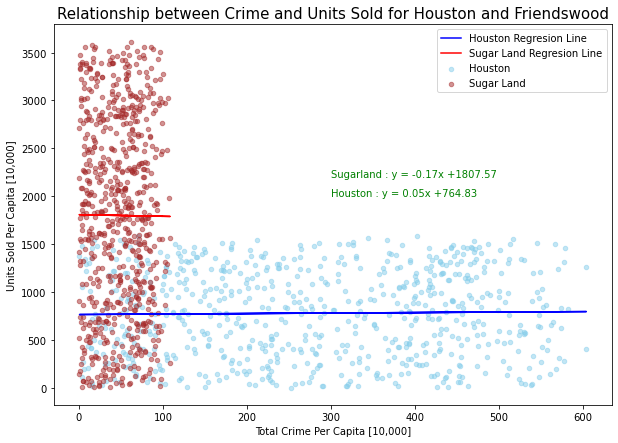

In [108]:
# Perform a linear regression on crime vs price
(slopeH, interceptH, rvalueH, pvalueH, stderrH) = stats.linregress(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'] )
# Get regression values
regress_valuesHouston = crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'] * slopeH + interceptH

 # Create line equation string
line_eqH = "Houston : y = " + str(round(slopeH,2)) + "x +" + str(round(interceptH,2))


# Perform a linear regression on temperature vs. latitude
(slopeF, interceptF, rvalueF, pvalueF, stderrF) = stats.linregress(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'] )
# Get regression values
regress_valuesFriendswood = crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'] * slopeF + interceptF
 # Create line equation string
line_eqF = "Sugarland : y = " + str(round(slopeF,2)) + "x +" + str(round(interceptF,2))


# Create Plot
ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color ='skyblue',  alpha=0.5, figsize=(10, 7))

crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color ='brown', alpha=0.5, figsize=(10, 7),  ax=ax1)

plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'],regress_valuesHouston,"b-")
plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'],regress_valuesFriendswood,"r-")

plt.text(300,2000,line_eqH, fontsize=10,color="green")
plt.text(300,2200,line_eqF, fontsize=10,color="green")

# plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
# plt.plot(x_values,regress_values,"r-")


# Scatter plots.
# ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color='blue', alpha=0.5, figsize=(10, 7))
# crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Estimate VALUE Owner-occupied units', color='brown', alpha=0.5, figsize=(10, 7), ax=ax1)

# # polynomial - males
# male_fit = np.polyfit(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'], 1)
# female_fit = np.polyfit(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'], 1)

# # # regression lines
# plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], male_fit[0] * crimeRandomSampleHoustondf['Estimate VALUE Owner-occupied units'] + male_fit[1], color='darkblue', linewidth=1)
# plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], female_fit[0] * crimeRandomSampleFriendswooddf['Estimate VALUE Owner-occupied units'] + female_fit[1], color='brown', linewidth=1)
# # # regression equations
# plt.text(100, 200, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
# plt.text(120, 300, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)



print(f"The r for Houston is: {rvalueH}")
print(f"The r for Sugrland  is: {rvalueF}")

# legend, title and labels.
plt.legend(labels=['Houston Regresion Line', 'Sugar Land Regresion Line', 'Houston', 'Sugar Land'])
plt.title('Relationship between Crime and Units Sold for Houston and Friendswood', size=15)
plt.xlabel('Total Crime Per Capita [10,000]', size=10)
plt.ylabel('Units Sold Per Capita [10,000]', size=10);